<a href="https://colab.research.google.com/github/dqdung1604/AI_Sem2_2022-2023/blob/main/AI_W4_2022_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=d86246dfac3afd3e39f73887a6af0a85f41a330cac13f5ae7b4f17130c1df084
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


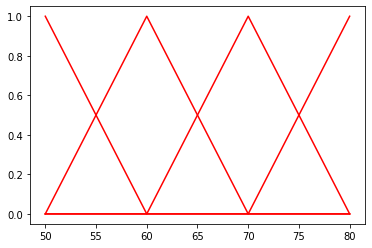

In [23]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(50, 81, 1)
slow = fuzz.trimf(x, [50, 50, 60])
medium = fuzz.trimf(x, [50, 60, 70])
medium_fast = fuzz.trimf(x, [60, 70, 80])
fast = fuzz.trimf(x, [70, 80, 80])

plt.figure()
plt.plot(x, slow, 'r', linewidth = 1.5, label = 'slow')
plt.plot(x, medium, 'r', linewidth = 1.5, label = 'medium')
plt.plot(x, medium_fast, 'r', linewidth = 1.5, label = 'medium_fast')
plt.plot(x, fast, 'r', linewidth = 1.5, label = 'fast')


16.54901960784313


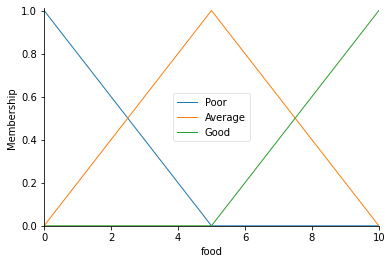

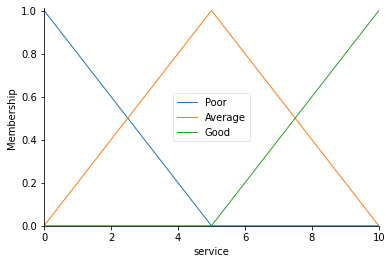

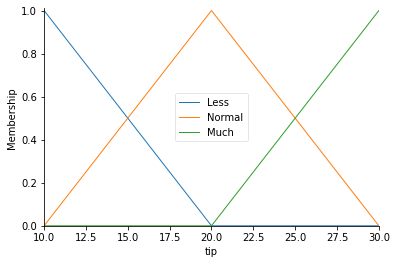

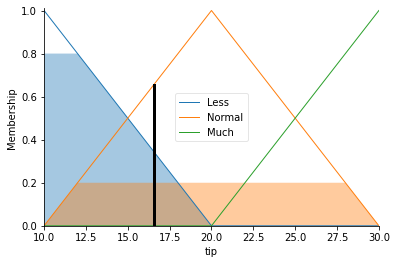

In [34]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(10, 31, 1), 'tip')

food['Poor'] = fuzz.trimf(food.universe, [0, 0, 5])
food['Average'] = fuzz.trimf(food.universe, [0, 5, 10])
food['Good'] = fuzz.trimf(food.universe, [5, 10, 10])

service['Poor'] = fuzz.trimf(service.universe, [0, 0, 5])
service['Average'] = fuzz.trimf(service.universe, [0, 5, 10])
service['Good'] = fuzz.trimf(service.universe, [5, 10, 10])

tip['Less'] = fuzz.trimf(tip.universe, [10, 10, 20])
tip['Normal'] = fuzz.trimf(tip.universe, [10, 20, 30])
tip['Much'] = fuzz.trimf(tip.universe, [20, 30, 30])

food.view()
service.view()
tip.view()

rule1 = ctrl.Rule(food['Poor'] & service['Poor'], tip['Less'])
rule2 = ctrl.Rule(food['Poor'] & service['Average'], tip['Less'])
rule3 = ctrl.Rule(food['Poor'] & service['Good'], tip['Normal'])
rule4 = ctrl.Rule(food['Average'] & service['Poor'], tip['Less'])
rule5 = ctrl.Rule(food['Average'] & service['Average'], tip['Normal'])
rule6 = ctrl.Rule(food['Average'] & service['Good'], tip['Normal'])
rule7 = ctrl.Rule(food['Good'] & service['Poor'], tip['Normal'])
rule8 = ctrl.Rule(food['Good'] & service['Average'], tip['Much'])
rule9 = ctrl.Rule(food['Good'] & service['Good'], tip['Much'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 1
tipping.input['service'] = 1
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)

8.333333333333332


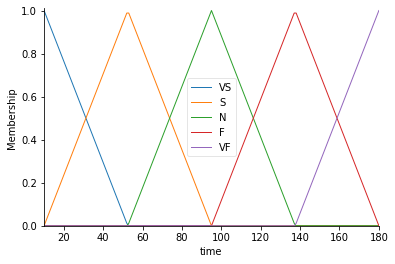

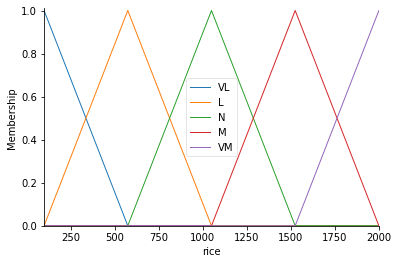

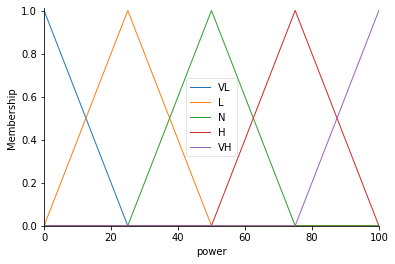

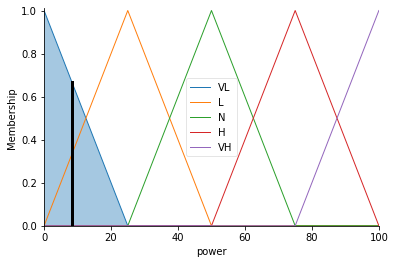

In [40]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(10, 181, 1), 'time')
rice = ctrl.Antecedent(np.arange(100, 2001, 1), 'rice')
power = ctrl.Consequent(np.arange(0, 101, 1), 'power')

time['VS'] = fuzz.trimf(time.universe, [10, 10, 52.5])
time['S'] = fuzz.trimf(time.universe, [10, 52.5, 95])
time['N'] = fuzz.trimf(time.universe, [52.5, 95, 137.5])
time['F'] = fuzz.trimf(time.universe, [95, 137.5, 180])
time['VF'] = fuzz.trimf(time.universe, [137.5, 180, 180])

rice['VL'] = fuzz.trimf(rice.universe, [100, 100, 575])
rice['L'] = fuzz.trimf(rice.universe, [100, 575, 1050])
rice['N'] = fuzz.trimf(rice.universe, [575, 1050, 1525])
rice['M'] = fuzz.trimf(rice.universe, [1050, 1525, 2000])
rice['VM'] = fuzz.trimf(rice.universe, [1525, 2000, 2000])

power['VL'] = fuzz.trimf(power.universe, [0, 0, 25])
power['L'] = fuzz.trimf(power.universe, [0, 25, 50])
power['N'] = fuzz.trimf(power.universe, [25, 50, 75])
power['H'] = fuzz.trimf(power.universe, [50, 75, 100])
power['VH'] = fuzz.trimf(power.universe, [75, 100, 100])


time.view()
rice.view()
power.view()

rule1 = ctrl.Rule(time['VS'] & rice['VL'], power['VL'])
rule2 = ctrl.Rule(time['VS'] & rice['L'], power['L'])
rule3 = ctrl.Rule(time['VS'] & rice['N'], power['N'])
rule4 = ctrl.Rule(time['VS'] & rice['M'], power['H'])
rule5 = ctrl.Rule(time['VS'] & rice['M'], power['H'])
rule6 = ctrl.Rule(time['S'] & rice['VL'], power['VL'])
rule7 = ctrl.Rule(time['S'] & rice['L'], power['L'])
rule8 = ctrl.Rule(time['S'] & rice['N'], power['N'])
rule9 = ctrl.Rule(time['S'] & rice['M'], power['N'])
rule10 = ctrl.Rule(time['S'] & rice['VM'], power['H'])
rule11 = ctrl.Rule(time['N'] & rice['VL'], power['VL'])
rule12 = ctrl.Rule(time['N'] & rice['L'], power['VL'])
rule13 = ctrl.Rule(time['N'] & rice['N'], power['N'])
rule14 = ctrl.Rule(time['N'] & rice['M'], power['H'])
rule15 = ctrl.Rule(time['N'] & rice['VM'], power['H'])
rule16 = ctrl.Rule(time['F'] & rice['VL'], power['VL'])
rule17 = ctrl.Rule(time['F'] & rice['L'], power['L'])
rule18 = ctrl.Rule(time['F'] & rice['N'], power['N'])
rule19 = ctrl.Rule(time['F'] & rice['M'], power['H'])
rule20 = ctrl.Rule(time['F'] & rice['VM'], power['H'])
rule21 = ctrl.Rule(time['N'] & rice['VL'], power['VL'])
rule22 = ctrl.Rule(time['N'] & rice['L'], power['L'])
rule23 = ctrl.Rule(time['N'] & rice['N'], power['N'])
rule24 = ctrl.Rule(time['N'] & rice['M'], power['H'])
rule25 = ctrl.Rule(time['N'] & rice['VM'], power['VH'])



powering_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule23, rule24, rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['time'] = 1
powering.input['rice'] = 1
powering.compute()
print(powering.output['power'])
power.view(sim = powering)